# Implement the CNN model for classifying CIFAR10 image dataset 


a) Loading and preprocessing the image data

In [55]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Dropout,Flatten,MaxPooling2D
from keras.utils import to_categorical

In [56]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [57]:
print("shape of training ",x_train.shape)
print("shape of testing ",x_test.shape)
print(type(x_train))

shape of training  (50000, 32, 32, 3)
shape of testing  (10000, 32, 32, 3)
<class 'numpy.ndarray'>


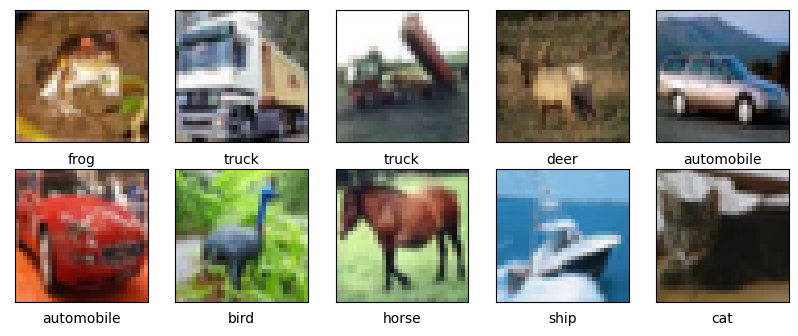

In [58]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

b. Defining the model's architecture

In [59]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

c. Training the model

In [60]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
epochs = 10
h = model.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 92s 57ms/step - loss: 1.5400 - accuracy: 0.4347 - val_loss: 1.2640 - val_accuracy: 0.5432
Epoch 2/10
1563/1563 [==============================] - 150s 96ms/step - loss: 1.1704 - accuracy: 0.5847 - val_loss: 1.0824 - val_accuracy: 0.6090
Epoch 3/10
1563/1563 [==============================] - 68s 44ms/step - loss: 1.0167 - accuracy: 0.6410 - val_loss: 1.0102 - val_accuracy: 0.6450
Epoch 4/10
1563/1563 [==============================] - 133s 85ms/step - loss: 0.9216 - accuracy: 0.6753 - val_loss: 0.9571 - val_accuracy: 0.6684
Epoch 5/10
1563/1563 [==============================] - 146s 93ms/step - loss: 0.8511 - accuracy: 0.6998 - val_loss: 0.8995 - val_accuracy: 0.6911
Epoch 6/10
1563/1563 [==============================] - 140s 89ms/step - loss: 0.7938 - accuracy: 0.7217 - val_loss: 0.8825 - val_accuracy: 0.6926
Epoch 7/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.7483 - accuracy: 0.7368 - val_loss: 0.91

d. Estimating the model's performance


In [61]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)


313/313 [==============================] - 4s 13ms/step - loss: 0.8635 - accuracy: 0.7083
Loss=0.864
Accuracy=0.708


In [62]:
y = to_categorical(y_test)
predicted_value = model.predict(x_test)

313/313 [==============================] - 4s 13ms/step


Actual Number:  automobile
Predicted Number:  automobile


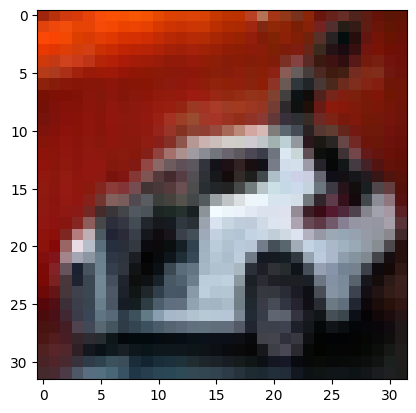

In [63]:
n = 6
plt.imshow(x_test[n])
print("Actual Number: ",class_names[np.argmax(y[n])])
print("Predicted Number: ", class_names[np.argmax(predicted_value[n])])

In [64]:
h = h.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

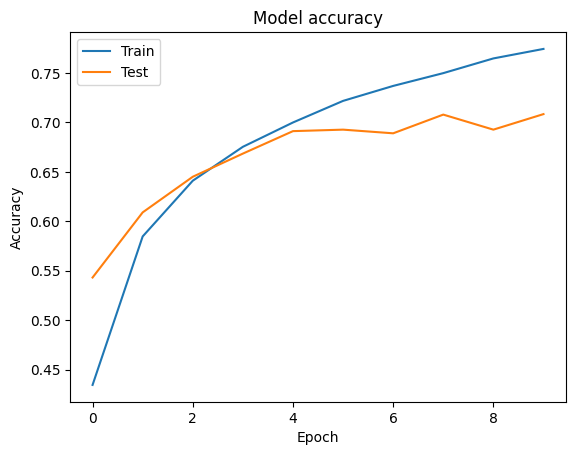

In [67]:
# Plot training & validation accuracy values
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     

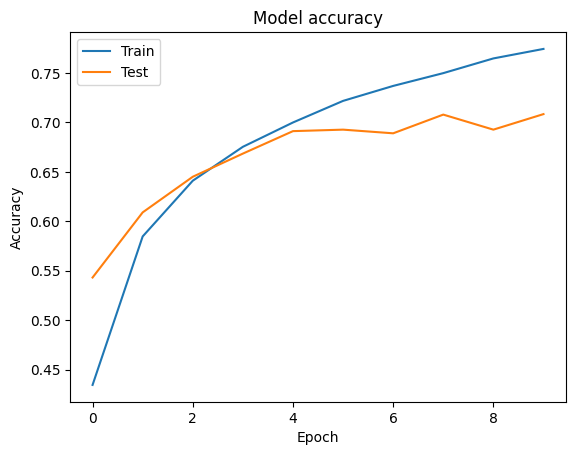

In [68]:
# Plot training & validation accuracy values
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
     